## Background

Healthy Bussiness Environment is happen when there is two or more company competing fairly with one another in order to serve the customer. it's pivotal for this to exist, because monopoly services tend to disbenefit customer. but number of company is not the sole factor that play a role. how good the competition, market share is spread among the competitors, also play a significant role.

For Goliath, the leading company, they tend to looking for way to maintain their position or even increasing their influence in bussiness. while for davids, it's important for them to give all that they have to stay in the game.

Let's us look closer on what happen on New York City Taxi Bussiness.

## Bussiness Problems:

### 1. How many companies that compete in the bussiness?

### 2. How good is one company compare to the other? 
(note: good here is measured by certain parameter that is pivotal in bussiness
 ex: total income, proportion of quantity of services) 

### 3. what cause one company to differ from the other?

## Data Dictionary

#### Feature Descriptions

#### VendorID
- **Description:** A code indicating the LPEP provider that provided the record.
- **Values:**
  - `1`: Creative Mobile Technologies, LLC.
  - `2`: VeriFone Inc.

#### lpep_pickup_datetime
- **Description:** The date and time when the meter was engaged.

#### lpep_dropoff_datetime
- **Description:** The date and time when the meter was disengaged.

#### Passenger_count
- **Description:** The number of passengers in the vehicle.
- **Details:** This is a driver-entered value.

#### Trip_distance
- **Description:** The elapsed trip distance in miles as reported by the taximeter.

#### PULocationID
- **Description:** TLC Taxi Zone in which the taximeter was engaged.

#### DOLocationID
- **Description:** TLC Taxi Zone in which the taximeter was disengaged.

#### RatecodeID
- **Description:** The final rate code in effect at the end of the trip.
- **Values:**
  - `1`: Standard rate
  - `2`: JFK
  - `3`: Newark
  - `4`: Nassau or Westchester
  - `5`: Negotiated fare
  - `6`: Group ride

#### Store_and_fwd_flag
- **Description:** Indicates whether the trip record was held in vehicle memory before sending to the vendor.
- **Values:**
  - `Y`: Store and forward trip
  - `N`: Not a store and forward trip

#### Payment_type
- **Description:** A numeric code signifying how the passenger paid for the trip.
- **Values:**
  - `1`: Credit card
  - `2`: Cash
  - `3`: No charge
  - `4`: Dispute
  - `5`: Unknown
  - `6`: Voided trip

#### Fare_amount
- **Description:** The time-and-distance fare calculated by the meter.

#### Extra
- **Description:** Miscellaneous extras and surcharges. Includes the $0.50 and $1 rush hour and overnight charges.

#### MTA_tax
- **Description:** $0.50 MTA tax automatically triggered based on the metered rate in use.

#### Improvement_surcharge
- **Description:** $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

#### Tip_amount
- **Description:** Tips automatically populated for credit card tips. Cash tips are not included.

#### Tolls_amount
- **Description:** The total amount of all tolls paid in the trip.

#### Total_amount
- **Description:** The total amount charged to passengers. Does not include cash tips.

#### Trip_type
- **Description:** A code indicating whether the trip was a street hail or a dispatch.
- **Values:**
  - `1`: Street-hail
  - `2`: Dispatch

#### Additional Details
##### Vehicle Types
- **Yellow Medallion Taxicab**
- **Street Hail Livery (SHL) / Green Taxi / Boro Taxi**
- **For-Hire Vehicle (FHV), Livery, Black Car, Luxury Limousine**

##### Rate Codes and Vehicle Type Correlation
- **Standard rate (likely Yellow Medallion or SHL)**
- **Airport ride (Yellow Medallion or SHL)**
- **Out of City Rate (Yellow Medallion or SHL)**
- **Negotiated fare (could be FHV or Livery)**
- **Group ride (Yellow Medallion or SHL)**

## DATA WRANGLING & DATA CLEANING

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:

df = pd.read_csv("NYC TLC Trip Record.csv")
display(df.head(5), df.shape)

C:\Users\HP\AppData\Local\Temp\ipykernel_25364\3086060822.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


(68211, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

### Inserting new column placeholder

In [4]:
# We would like to create a placeholder column that later would be filled with values extracted from the datetime
df.insert(2, "year", value=1)
df.insert(3, "month", value=1)
df.insert(4, "day", value=1)
df.insert(5, "day_name", value=1)
df.insert(6, "pickup_time", value=1)
df.insert(7, "duration", value=1)
df.head()

,VendorID,lpep_pickup_datetime,year,month,day,day_name,pickup_time,duration,lpep_dropoff_datetime,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,1,1,1,1,1,1,2023-01-01 00:37:11,N,...,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,1,1,1,1,1,1,2023-01-01 00:57:49,N,...,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,1,1,1,1,1,1,2023-01-01 00:41:32,N,...,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,1,1,1,1,1,1,2023-01-01 00:19:03,N,...,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,1,1,1,1,1,1,2023-01-01 00:39:02,N,...,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


### Data extraction from datetime

In [5]:
# This code is created inorder to extract information from the datetime, such as pickup, dropoff datetime

def parsing_datetime(datetime, keyword):
    date, time = datetime.split(" ")
    year, month, day = date.split("-")
    if keyword == "year":
        return int(year)
    elif keyword == "month":
        return int(month)
    elif keyword == "day":
        return int(day)
    elif keyword == "time":
        return time

def trip_duration(duration):
    minutes = int(duration//60)
    seconds = int(duration - minutes*60)
    if seconds >= 30:
        minutes += 1
    return minutes

def assign_day(day):
    day = (day-1)%7 # 1 january is sunday, 2 january is monday
    if day == 1:
        return "Monday"
    elif day == 2:
        return "Tuesday"
    elif day == 3:
        return "Wednesday"
    elif day == 4:
        return "Thursday"
    elif day == 5:
        return "Friday"
    elif day == 6:
        return "Saturday"
    else:
        return "Sunday"
    
def string_to_date(string):
    return datetime.strptime(string, "%Y-%m-%d %H:%M:%S")

In [6]:
df["year"] = df["lpep_pickup_datetime"].apply(parsing_datetime, keyword="year")
df["month"] = df["lpep_pickup_datetime"].apply(parsing_datetime, keyword="month")
df["day"] = df["lpep_pickup_datetime"].apply(parsing_datetime, keyword="day")
df["pickup_time"] = df["lpep_pickup_datetime"].apply(parsing_datetime, keyword="time")
df.head()

,VendorID,lpep_pickup_datetime,year,month,day,day_name,pickup_time,duration,lpep_dropoff_datetime,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023,1,1,1,00:26:10,1,2023-01-01 00:37:11,N,...,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023,1,1,1,00:51:03,1,2023-01-01 00:57:49,N,...,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023,1,1,1,00:35:12,1,2023-01-01 00:41:32,N,...,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023,1,1,1,00:13:14,1,2023-01-01 00:19:03,N,...,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023,1,1,1,00:33:04,1,2023-01-01 00:39:02,N,...,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


### Dropping data with out of range datetime

In [7]:
# now because we already have the date time parsing into different set of columns, it's time for us to drop those outside of the timespan range
discrete_year = df[["year"]].value_counts()
discrete_month = df[["month"]].value_counts()
df[((df["year"] != 2023) | (df["month"] != 1))]

,VendorID,lpep_pickup_datetime,year,month,day,day_name,pickup_time,duration,lpep_dropoff_datetime,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,2022,12,9,1,14:10:49,1,2022-12-09 14:22:26,N,...,0.0,0.5,0.00,0.00,NaN,0.3,16.80,2.0,1.0,0.00
318,2,2022-12-09 14:55:42,2022,12,9,1,14:55:42,1,2022-12-09 15:33:06,N,...,0.0,0.5,0.00,6.55,NaN,0.3,35.60,2.0,1.0,2.75
17874,2,2009-01-01 20:21:27,2009,1,1,1,20:21:27,1,2009-01-02 11:07:31,N,...,0.0,0.5,7.20,0.00,NaN,1.0,43.20,1.0,1.0,0.00
25100,2,2023-02-01 03:10:05,2023,2,1,1,03:10:05,1,2023-02-01 03:40:35,N,...,0.0,0.0,5.66,0.00,NaN,0.3,33.96,1.0,2.0,0.00


In [8]:
df = df[~((df["year"] != 2023) | (df["month"] != 1))]

### Filling the day name column

In [9]:
df["day_name"] = df["day"].apply(assign_day)

In [10]:
# create column duration, and then delete the lpep_pickup_datetime and lpep_drop_off datetime
dtype_dict = {
    "lpep_pickup_datetime": "datetime64[ns]",
    "lpep_dropoff_datetime": "datetime64[ns]"
}
df = df.astype(dtype=dtype_dict)
result = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
df["duration"] = result.dt.total_seconds().astype(int)
df["duration"] = df["duration"].apply(trip_duration)
df = df.drop(columns=["lpep_pickup_datetime", "lpep_dropoff_datetime", "ehail_fee"])
df.head()


,VendorID,year,month,day,day_name,pickup_time,duration,store_and_fwd_flag,RatecodeID,PULocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023,1,1,Sunday,00:26:10,11,N,1.0,166,...,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023,1,1,Sunday,00:51:03,7,N,1.0,24,...,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023,1,1,Sunday,00:35:12,6,N,1.0,223,...,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023,1,1,Sunday,00:13:14,6,N,1.0,41,...,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023,1,1,Sunday,00:33:04,6,N,1.0,41,...,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


### Correcting invalid values

In [11]:
## before we dive deep, it's important to then create no amount values is negative
df["fare_amount"] = df["fare_amount"].abs()
df["extra"] = df["extra"].abs()
df["mta_tax"] = df["mta_tax"].abs()
df["tip_amount"] = df["tip_amount"].abs()
df["trip_distance"] = df["trip_distance"].abs()
df["tolls_amount"] = df["tolls_amount"].abs()
df["improvement_surcharge"] = df["improvement_surcharge"].abs()
df["congestion_surcharge"] = df["congestion_surcharge"].abs()
df["total_amount"] = df["total_amount"].abs()


### MISSING VALUE SYNTHESIS

In [63]:
df.isnull().sum()

VendorID                 0
year                     0
month                    0
day                      0
day_name                 0
pickup_time              0
duration                 0
RatecodeID               0
DOZone                   0
DOLocation               0
PULocation               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
miscellaneous            0
dtype: int64

In [13]:
## We see that some columns contain many null values. let's try clean that either by drop it or filling with certain values

#### Payment type columms

In [14]:
## in the data_dict, it was showed that there are fare amount-- which is counted from the taxi meters
## but then there are total amount which have to be payed by the customer (including some addtional fare & tips)
## it's also happen that our type payment make possible that tips are not included in total_amount when customer pay it cash instead of credit card.
## so to be fair, we should strip of the current total amount for credit card to not included tips, as it is with cash
## this can be also be the clue in order to fulfill the customer null columns for the type of payment
## where if the tips == 0, means that it would be cash, if it's not the payment should be by credit card

df[["payment_type"]].value_counts()

payment_type
1.0             40684
2.0             22630
3.0               472
4.0                95
5.0                 2
Name: count, dtype: int64

In [15]:
## from the above we see the most dominant payment type is credit card, followed by cash.
## other than that, just take a really small amount, if not negligible, of the proportion.
## let's look at the proportion of tips for credit and cash
print("tip_amount from cash payment", end="")
display(df[df["payment_type"] == 2][["tip_amount"]].value_counts())
print("number of transactions for 0 tip groupby payment type", end="") 
display(df[df["tip_amount"] == 0][["payment_type"]].value_counts())

tip_amount from cash payment

tip_amount
0.0           22629
5.0               1
Name: count, dtype: int64

number of transactions for 0 tip groupby payment type

payment_type
2.0             22629
1.0              5145
3.0               456
4.0                93
5.0                 2
Name: count, dtype: int64

In [16]:
## Only one transaction in cash, where tips is not 0 (but how is it possible? when the datadict say something different). but still our assumption that cash payment doesn't include tips is true.
## The second table say that, the no tips, is populated most by cash payment by a very significant proportion.
## we could deduce then that if we want to fill the nan cell in payment type, it's best to rely on this assumption
## given that if tips == 0, then it's cash, while it's not, then it's credit_card

df.loc[df["payment_type"].isna(), "payment_type"] = df.loc[df["payment_type"].isna(), "payment_type"].apply(lambda x: 1 if x != 0 else 2)
df["payment_type"] = df["payment_type"].astype(int)
df["payment_type"].isna().sum()

0

In [17]:
## not stopping there, we have to strip off the tips from the total_amount fair, for each type of payment
## the assumption here is that other than cash, other type of payment assumed to be look like credit card
## this means that the tip, if exist, would be included in total_amount
## but first of all let see for another type of payment, the tips and total_amount

df[(df["tip_amount"] > 0) & (df["payment_type"] > 2)][["tip_amount", "total_amount", "payment_type"]]

,tip_amount,total_amount,payment_type
3409,0.90,5.40,3
3410,0.90,5.40,3
7793,0.90,5.40,3
7794,0.90,5.40,3
8107,0.01,4.51,3
8108,0.01,4.51,3
10336,0.13,5.33,3
10337,0.13,5.33,3
14707,10.50,15.00,4
14708,10.50,15.00,4


In [18]:
## from above we can see that, the number of data is not much, and also the total_amount is bigger than the tip.
## so it would be safe for us, to treat these type of payment as if it's credit card

In [19]:
df[["tip_amount", "total_amount", "payment_type"]].head()

,tip_amount,total_amount,payment_type
0,4.03,24.18,1
1,2.64,15.84,1
2,1.94,11.64,1
3,1.70,10.20,1
4,0.00,8.00,1


In [20]:
### substracting total_amount from tip_amount, so that total amount doesn't contain tip amount
df.loc[df["payment_type"] != 2, "total_amount"] = df[df["payment_type"] != 2]["total_amount"] - df[df["payment_type"] != 2]["tip_amount"]
df[["tip_amount", "total_amount", "payment_type"]].head()

,tip_amount,total_amount,payment_type
0,4.03,20.15,1
1,2.64,13.20,1
2,1.94,9.70,1
3,1.70,8.50,1
4,0.00,8.00,1


#### Additional fare (Miscellaneous)

In [21]:
## we have tree kind of fare, fare amount, tip amount, and additonal fare(mta-amount, congestion, etc.)
## it's better to then calculate the miscellanous amount (which is the combination of amount other than fare and tip)
df["miscellaneous"] = df[["extra", "mta_tax", "congestion_surcharge", "tolls_amount", "improvement_surcharge"]].sum(axis=1)
df.head()

,VendorID,year,month,day,day_name,pickup_time,duration,store_and_fwd_flag,RatecodeID,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,miscellaneous
0,2,2023,1,1,Sunday,00:26:10,11,N,1.0,166,...,1.0,0.5,4.03,0.0,1.0,20.15,1,1.0,2.75,5.25
1,2,2023,1,1,Sunday,00:51:03,7,N,1.0,24,...,1.0,0.5,2.64,0.0,1.0,13.20,1,1.0,0.00,2.50
2,2,2023,1,1,Sunday,00:35:12,6,N,1.0,223,...,1.0,0.5,1.94,0.0,1.0,9.70,1,1.0,0.00,2.50
3,1,2023,1,1,Sunday,00:13:14,6,N,1.0,41,...,0.5,1.5,1.70,0.0,1.0,8.50,1,1.0,0.00,3.00
4,1,2023,1,1,Sunday,00:33:04,6,N,1.0,41,...,0.5,1.5,0.00,0.0,1.0,8.00,1,1.0,0.00,3.00


#### FWD Drop

In [22]:
## in this dataset, I less interested in store_and_fwd_flag because it gives no insight about passenger and order.
## it might be gives insight to the tech department of the company, but not for us right now.
## so it's better to drop that column
df = df.drop(columns=["store_and_fwd_flag"])
df.head() 

,VendorID,year,month,day,day_name,pickup_time,duration,RatecodeID,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,miscellaneous
0,2,2023,1,1,Sunday,00:26:10,11,1.0,166,143,...,1.0,0.5,4.03,0.0,1.0,20.15,1,1.0,2.75,5.25
1,2,2023,1,1,Sunday,00:51:03,7,1.0,24,43,...,1.0,0.5,2.64,0.0,1.0,13.20,1,1.0,0.00,2.50
2,2,2023,1,1,Sunday,00:35:12,6,1.0,223,179,...,1.0,0.5,1.94,0.0,1.0,9.70,1,1.0,0.00,2.50
3,1,2023,1,1,Sunday,00:13:14,6,1.0,41,238,...,0.5,1.5,1.70,0.0,1.0,8.50,1,1.0,0.00,3.00
4,1,2023,1,1,Sunday,00:33:04,6,1.0,41,74,...,0.5,1.5,0.00,0.0,1.0,8.00,1,1.0,0.00,3.00


#### Passenger amount insertion

In [23]:
## to fill the nan value of the passenger, I would like to fill it with 1, only because it's the mode in the data.
## the assumption I make is that the number of passenger do not affect the fare amount.
## so It's reasonable and justify to just fill it with 1
df[["passenger_count"]].value_counts()


passenger_count
1.0                54296
2.0                 5095
5.0                 1772
6.0                 1054
3.0                  958
4.0                  364
0.0                  336
7.0                    4
8.0                    2
9.0                    2
Name: count, dtype: int64

In [24]:
## it dominates by the 1 passenger with so big proportion. so it's reasonable to fill it with the mode

df.loc[df["passenger_count"].isna(), "passenger_count"] = 1

#### Trip type insertion

In [25]:
## I assume that trip_type to do no affect on the fare amount
## So we can just put it randomly into the data, but something need to be in consideration
## My focus on the later should be on the vendor, so it's better for me to know the proprtion for the trip_type in each vendor ID
## then put the proprtion as the proportion in that vendor

display("vendor ID == 1", df[df["VendorID"] == 1][["trip_type"]].value_counts(normalize=True))
display("vendor ID == 1", df[df["VendorID"] == 2][["trip_type"]].value_counts(normalize=True))

'vendor ID == 1'

trip_type
1.0          0.993373
2.0          0.006627
Name: proportion, dtype: float64

'vendor ID == 1'

trip_type
1.0          0.975507
2.0          0.024493
Name: proportion, dtype: float64

In [26]:
# because the proportion is almost 1 for each vendor. it's reasonable for us to just input 1 as the default value for replacing the nan
df.loc[df["trip_type"].isna(), "trip_type"] = 1


In [27]:
df["trip_type"] = df['trip_type'].astype(dtype=int)
df['passenger_count'] = df['passenger_count'].astype(dtype=int)

#### Congestion Surcharge insertion

In [28]:
df[["congestion_surcharge"]].value_counts()

congestion_surcharge
0.00                    46993
2.75                    16874
2.50                       16
Name: count, dtype: int64

In [29]:
## it seems that congestion_surcharge is non negative, so the negative should be treated as it's absolute.
## and it seems that congestion_surcharge amount, if demand, is 2.75.
## this value is supported by the statement in the official website
## quoted "Plus New York State Congestion Surcharge of $2.75 (Green Taxi and FHV) for all trips that begin, end or pass through Manhattan south of 96th Street"
## we don't know exactly where is manhattan south of 96 street and at what condition the taxi pass that way, so we assume it to be only in begin, and end in manhattan borough"
## but before that, we need to integrate the taxi zone into our dataframe(df)

##### Taxi zone integration to main dataframe

In [30]:
taxi_zone_df = pd.read_csv("taxi_zone_lookup.csv")
display(taxi_zone_df.head(5), taxi_zone_df.shape)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


(265, 4)

In [31]:
taxi_zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [32]:
# make the 265 from nan to unknown
taxi_zone_df.loc[taxi_zone_df["LocationID"] == 265, "Borough"] = "Unknown"
taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
taxi_zone_df = taxi_zone_df[["LocationID", "Borough", "Zone"]]

do_df = pd.merge(df[["DOLocationID"]], taxi_zone_df, how="left", left_on = "DOLocationID", right_on="LocationID") #, ignore_index=False)
pu_df = pd.merge(df[["PULocationID"]], taxi_zone_df, how="left", left_on = "PULocationID", right_on="LocationID") #, ignore_index=False)
## display(pu_df, do_df)
df.insert(8, "PULocation", pu_df["Borough"])
df.insert(8, "DOLocation", do_df["Borough"])
df.insert(8, "DOZone", do_df["Zone"])


In [35]:
df.loc[(df["congestion_surcharge"].isna()) & ((df["DOLocation"] == "Manhattan") | (df["PULocation"] == "Manhattan")), "congestion_surcharge"] = 2.75
df.loc[df["congestion_surcharge"].isna(), "congestion_surcharge"] = 0


In [36]:
df["congestion_surcharge"] = df["congestion_surcharge"].abs()

#### RateCodeID Insertion

In [37]:
## our goal is to fill the nan values in RatecodeID
## Our strategy is filling the nan randomly based on the available values, with the same proportion as the current dataset
## so that our undertaking does not change the data distribution.
df[["RatecodeID"]].value_counts()

RatecodeID
1.0           62100
5.0            1528
2.0             158
4.0              57
3.0              30
99.0             10
Name: count, dtype: int64

In [38]:
### there is ratecodeID 99, but in dataset we only have 1 until 6 encoding. From this it would be good to see the proportions of ratecodeID for each vendor
df.groupby(["VendorID", "RatecodeID"])["RatecodeID"].count()

VendorID  RatecodeID
1         1.0            9102
          2.0              14
          3.0               4
          4.0               7
          5.0              78
          99.0             10
2         1.0           52998
          2.0             144
          3.0              26
          4.0              50
          5.0            1450
Name: RatecodeID, dtype: int64

In [39]:
# ratecodeID fill for vendorID == 1
vendor1_nan_ratecode_num = df[(df["VendorID"] == 1) & (df["RatecodeID"].isna())].shape[0]
n = [9102, 14, 4, 7, 78]
total_n = sum(n)
result = np.random.choice([1, 2, 3, 4, 5], size=vendor1_nan_ratecode_num, p = [n[0]/total_n, n[1]/total_n, n[2]/total_n, n[3]/total_n, n[4]/total_n,])
result

df.loc[(df["VendorID"] == 1) & (df["RatecodeID"].isna()), "RatecodeID"] = result

# ratecodeID fill for vendorID == 1
vendor2_nan_ratecode_num = df[(df["VendorID"] == 2) & (df["RatecodeID"].isna())].shape[0]
n = [52998, 144, 26, 50, 1450]
total_n = sum(n)
result = np.random.choice([1, 2, 3, 4, 5], size=vendor2_nan_ratecode_num, p = [n[0]/total_n, n[1]/total_n, n[2]/total_n, n[3]/total_n, n[4]/total_n,])
result

df.loc[(df["VendorID"] == 2) & (df["RatecodeID"].isna()), "RatecodeID"] = result

#### Zone Null Insertion

In [41]:
df.fillna(value="unknown", inplace=True)

#### Missing Value Synthesis end point

In [42]:
df.isna().sum()

VendorID                 0
year                     0
month                    0
day                      0
day_name                 0
pickup_time              0
duration                 0
RatecodeID               0
DOZone                   0
DOLocation               0
PULocation               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
miscellaneous            0
dtype: int64

### Dropping Unlikely Value

#### Fare (Fare == 0)

In [43]:
## Now we go to the next phase of the cleaning. which is we looking for the unlikely values that might exist in the data

## for fare = 0, because fare amount is very unlikely to be zero, so we treat that as invalid data
## that kind of data should be dropped from our dataframe

print(df[df["fare_amount"] == 0].shape[0])

print("before dropping, the amount of data in dataframe :", df.shape[0])
df = df[~(df["fare_amount"] == 0)]
print("after dropping, the amount of data in dataframe :", df.shape[0])

83
before dropping, the amount of data in dataframe : 68207
after dropping, the amount of data in dataframe : 68124


#### Distance (distance == 0)

In [44]:
## for distance = 0, because distance amount is very unlikely to be zero, so we treat that as invalid data,
## therefore we should drop it

print(df[df["trip_distance"] == 0].shape[0])

print("before dropping, the amount of data in dataframe :", df.shape[0])
df = df[~(df["trip_distance"] == 0)]
print("after dropping, the amount of data in dataframe :", df.shape[0])

3286
before dropping, the amount of data in dataframe : 68124
after dropping, the amount of data in dataframe : 64838


## LOOKING FOR OUTLIERS

In [45]:
df.head()

,VendorID,year,month,day,day_name,pickup_time,duration,RatecodeID,DOZone,DOLocation,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,miscellaneous
0,2,2023,1,1,Sunday,00:26:10,11,1.0,Lincoln Square West,Manhattan,...,1.0,0.5,4.03,0.0,1.0,20.15,1,1,2.75,5.25
1,2,2023,1,1,Sunday,00:51:03,7,1.0,Central Park,Manhattan,...,1.0,0.5,2.64,0.0,1.0,13.20,1,1,0.00,2.50
3,1,2023,1,1,Sunday,00:13:14,6,1.0,Upper West Side North,Manhattan,...,0.5,1.5,1.70,0.0,1.0,8.50,1,1,0.00,3.00
4,1,2023,1,1,Sunday,00:33:04,6,1.0,East Harlem North,Manhattan,...,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,3.00
5,2,2023,1,1,Sunday,00:53:31,18,1.0,Yorkville East,Manhattan,...,1.0,0.5,0.00,0.0,1.0,22.95,2,1,2.75,5.25


In [46]:
numerical_columns = ["fare_amount", "total_amount", "trip_distance", "mta_tax", "extra", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge"]

In [47]:
def box_plot(df, features):
    n_column_axis = 3
    fig, ax = plt.subplots(math.ceil(len(features)/n_column_axis), n_column_axis, figsize=(20, 15))
    column_num = 0
    row_num = 0
    for feature in features:
        if column_num == 3:
            row_num += 1
            column_num = 0
        sns.boxplot(data=df, x=feature, ax=ax[row_num][column_num])
        column_num += 1
        if row_num + column_num == len(features):
            break
    plt.tight_layout()
    plt.show()

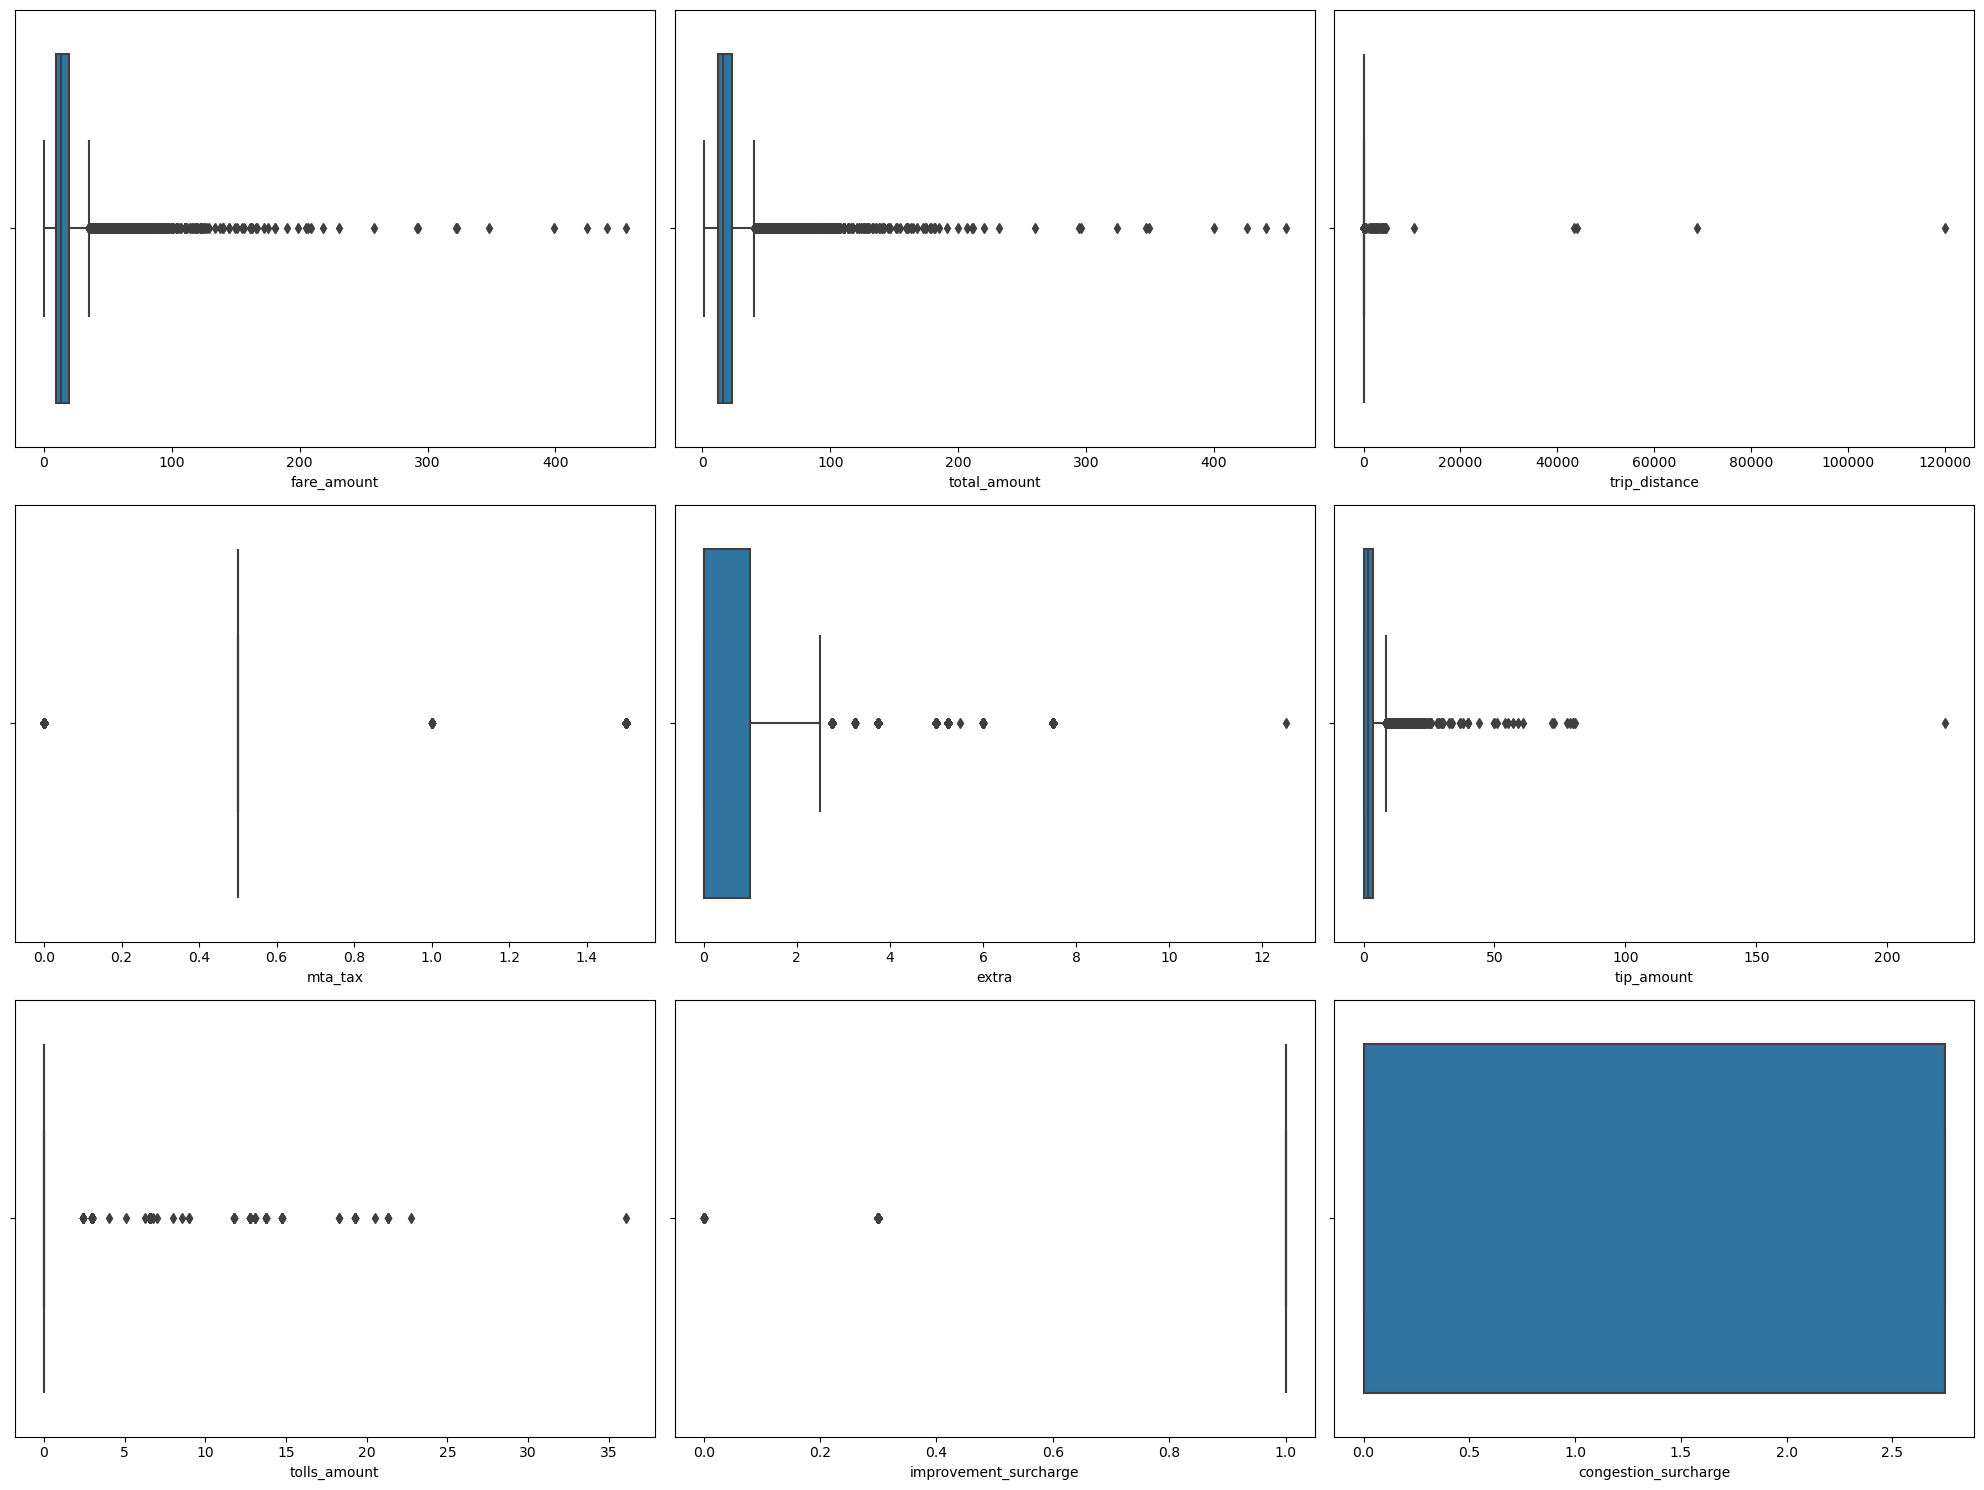

In [48]:
box_plot(
    df=df,
    features = numerical_columns
)

In [49]:
Q1 = df[numerical_columns].quantile(0.25)
print('Q1 are:')
print(Q1)

Q1 are:
fare_amount               9.30
total_amount             11.80
trip_distance             1.22
mta_tax                   0.50
extra                     0.00
tip_amount                0.00
tolls_amount              0.00
improvement_surcharge     1.00
congestion_surcharge      0.00
Name: 0.25, dtype: float64


In [50]:
Q3 = df[numerical_columns].quantile(0.75)
print('Q3 are:')
print(Q3)

Q3 are:
fare_amount              19.70
total_amount             23.35
trip_distance             3.33
mta_tax                   0.50
extra                     1.00
tip_amount                3.41
tolls_amount              0.00
improvement_surcharge     1.00
congestion_surcharge      2.75
Name: 0.75, dtype: float64


In [51]:
IQR = Q3 - Q1
print("The IQR are:")
print(IQR)

The IQR are:
fare_amount              10.40
total_amount             11.55
trip_distance             2.11
mta_tax                   0.00
extra                     1.00
tip_amount                3.41
tolls_amount              0.00
improvement_surcharge     0.00
congestion_surcharge      2.75
dtype: float64


In [52]:
lower_bound = Q1 - 1.5 * IQR
print("The lower bound are:")
print(lower_bound)

The lower bound are:
fare_amount             -6.300
total_amount            -5.525
trip_distance           -1.945
mta_tax                  0.500
extra                   -1.500
tip_amount              -5.115
tolls_amount             0.000
improvement_surcharge    1.000
congestion_surcharge    -4.125
dtype: float64


In [53]:
upper_bound = Q3 + 1.5 * IQR
print("The upper bound are:")
print(upper_bound)

The upper bound are:
fare_amount              35.300
total_amount             40.675
trip_distance             6.495
mta_tax                   0.500
extra                     2.500
tip_amount                8.525
tolls_amount              0.000
improvement_surcharge     1.000
congestion_surcharge      6.875
dtype: float64


In [54]:
for columns in numerical_columns:
  q1 = df[[columns]].describe().loc['25%']
  q3 = df[[columns]].describe().loc['75%']
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  total_outliers = len(df[(df[columns] < lower_bound) | (df[columns] > upper_bound)])
  print(f'{columns} have {total_outliers} outliers.')

fare_amount have 3851 outliers.
total_amount have 3721 outliers.
trip_distance have 5533 outliers.
mta_tax have 12685 outliers.
extra have 3510 outliers.
tip_amount have 1820 outliers.
tolls_amount have 1528 outliers.
improvement_surcharge have 3894 outliers.
congestion_surcharge have 0 outliers.


C:\Users\HP\AppData\Local\Temp\ipykernel_25364\658217789.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  upper_bound = float(q3 + whis)
C:\Users\HP\AppData\Local\Temp\ipykernel_25364\658217789.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lower_bound = float(q1 - whis)
C:\Users\HP\AppData\Local\Temp\ipykernel_25364\658217789.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  upper_bound = float(q3 + whis)
C:\Users\HP\AppData\Local\Temp\ipykernel_25364\658217789.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lower_bound = float(q1 - whis)
C:\Users\HP\AppData\Local\Temp\ipykernel_253

In [55]:
## from the data above, we can see that the outliers for every column is so big.
## if we drop this all, we would lost so many information, and it's not good for us
## so I decided to drop the one who very unlikely to be happen outliers of outliers

## trip_distance > 2000 is satisfied the criteria, so we just dropped it

print("the number of outlier of outliers in trip_distance :",df[df["trip_distance"] > 200].shape[0])

drop_index = df[df['trip_distance'] > 200].index
df.drop(index=drop_index, inplace=True)


the number of outlier of outliers in trip_distance : 36


In [56]:
## fare_amount > 200 is satisfied the criteria, so we just dropped it

print("the number of outlier of outliers in fare_amount :",df[df["fare_amount"] > 450].shape[0])

drop_index = df[df['fare_amount'] > 450].index
df.drop(index=drop_index, inplace=True)

the number of outlier of outliers in fare_amount : 1


In [57]:
initial_num = 68211
final_num = df.shape[0]
print("initial number of data :", initial_num)
print("number of data after cleaning :", final_num)
print("number of data dropped in the process :", initial_num - final_num)
print("Percentage of data dropped in the process :", round((initial_num - final_num)/initial_num*100, 2), "percent")

initial number of data : 68211
number of data after cleaning : 64801
number of data dropped in the process : 3410
Percentage of data dropped in the process : 5.0 percent


In [58]:
## from the above line we see that we drop 4.99% of the inital data.
## it still allowable as it is still < 10 %
## now we finished cleaning.

## SAVE CLEANED DATA

In [80]:
# df.reset_index(drop=True, inplace=True)
# df.to_csv("clean_data_final.csv")

## Explorary Data Analysis

In [60]:
### Problem

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


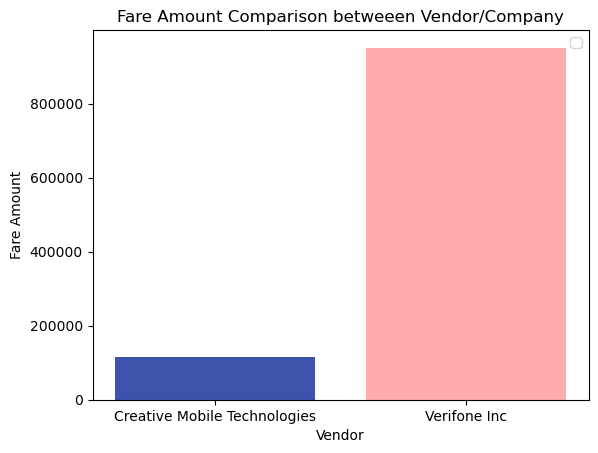

In [78]:
fare = df.groupby("VendorID")[["fare_amount"]].sum()
fare
vendor = ["Creative Mobile Technologies", "Verifone Inc"]
plt.title("Fare Amount Comparison betweeen Vendor/Company")
plt.bar(data=fare, x=vendor, height="fare_amount", color =["#3E54AC", '#FFACAC'])
plt.ylabel("Fare Amount")
plt.xlabel("Vendor")
plt.legend()

In [ ]:
### Vendor 2, Verifone Inc, have total_income 8 times of the Vendor ID 1, Creative Mobile Technologies, Total income.


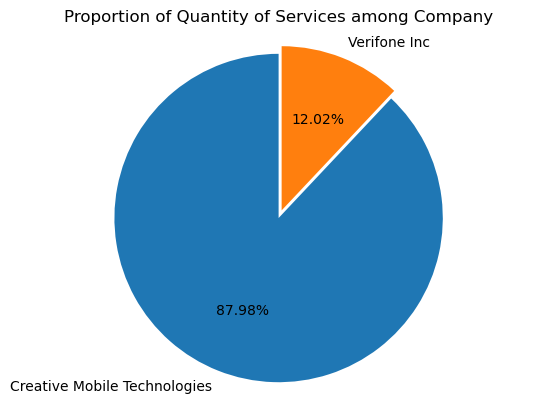

In [79]:
qty_proportion = df[["VendorID"]].value_counts().reset_index()
vendor = ["Creative Mobile Technologies", "Verifone Inc"]
#qty_proportion
plt.title("Proportion of Quantity of Services among Company")
plt.pie(x = qty_proportion["count"], labels= vendor,
        autopct="%.2f%%",
        startangle=90,
        explode=[0.05, 0])
plt.axis("Equal")
plt.show()


In [ ]:
### Thus We Already explore our problem. we continue this on tableau ya, bye bye!